In [469]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from matplotlib.figure import Figure 
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [470]:
data = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


In [471]:
data.describe()

,SpringPos,StockPrice
count,226.000000,226.000000
mean,3.785221,14.187743
std,10.704778,7.447450
min,-19.910000,0.670000
25%,-3.960000,8.355000
50%,4.195000,13.970000
75%,11.295000,19.632500
max,26.100000,30.050000


#For the spring Position


<function matplotlib.pyplot.show(close=None, block=None)>

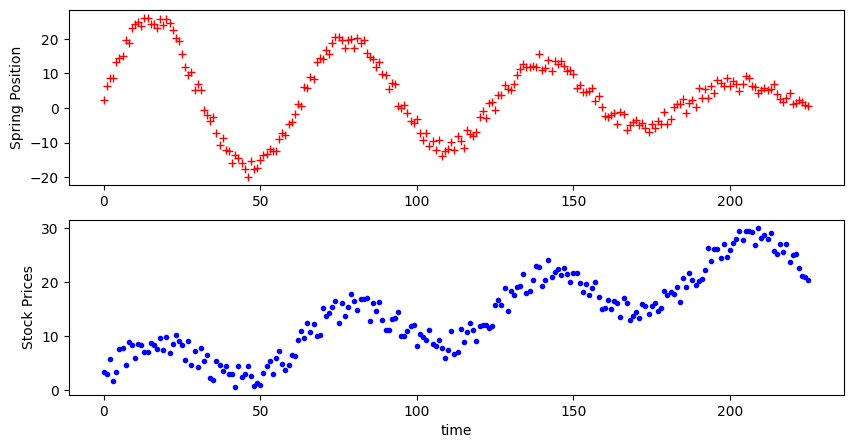

In [472]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(data.SpringPos, 'r+',)
ax2.plot(data.StockPrice, 'b.')
fig.set_figwidth(10)
fig.set_figheight(5)
ax2.set_xlabel('time')
ax1.set_ylabel('Spring Position')
ax2.set_ylabel('Stock Prices')
plt.show

### Task 3

### OLS for the Spring Price

fitting a Linear model on the dataset

In [473]:
y1 = pd.DataFrame({'x':range(226), 'y':data.SpringPos})
y1.head()


,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


Turning the data into matrices


In [474]:
yy = np.array(y1.y) 
xx.shape = (226,1)


In [475]:

mat = np.transpose(xx)
mat.shape
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta)
sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)

Beta =  [-0.67237759]
SSE =  27738.51607526325


### Linear search of theta such that sse is min.

In [476]:
def error_cal(theta):
    pred=[np.tan(theta)*t for t in y1.x]
    err_arr=[]
    true_arr=np.array(y1.y)
    for i in range(0,61):
        err_arr.append((true_arr[i]-pred[i])**2)
        
    return np.sum(err_arr)

err_arr1 = []
for i in np.arange(0,np.pi/3,np.pi/16):
    err_arr1.append(error_cal(i))
print('SSE =' ,err_arr1)    


SSE = [np.float64(15743.124499999996), np.float64(21214.65907198907), np.float64(33719.431035242334), np.float64(57266.28765697189), np.float64(102378.66449999997), np.float64(200259.66595403914)]


### Plotting theta vs SSE 

In [477]:
err_arr1[0]

np.float64(15743.124499999996)

In [478]:
np.min(err_arr1)


np.float64(15743.124499999996)

In [479]:

np.max(err_arr1)

np.float64(200259.66595403914)

In [480]:
x_axis = np.arange(0,np.pi/3,np.pi/16)
x_axis

array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816,
       0.9817477 ])

In [481]:

min_ind = np.argmin(err_arr1)
min_ind #SSE is minimum at theta = 0

np.int64(0)

### Plotting theta vs SSE

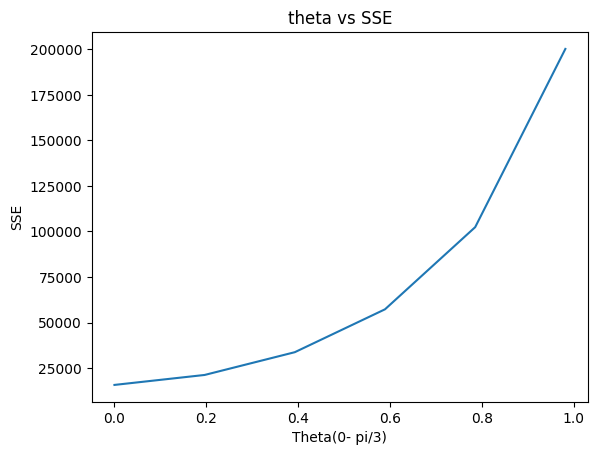

In [482]:
plt.figure()
x_axis = np.arange(0,np.pi/3,np.pi/16)
y_axis = err_arr1
plt.plot(x_axis,y_axis)
plt.xlabel('Theta(0- pi/3)')
plt.ylabel('SSE')
plt.title('theta vs SSE')
plt.show()

### We'll need to calculate beta, yhat and SSE multiple times so defining functions to calculate the same


In [483]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [484]:
x = y1.x.values
y = y1.y.values

In [485]:
x.shape =(226,1)

In [486]:
beta = estimateBeta(x,y)
beta

array([0.01832175])

In [487]:
yhat1 = predict(beta, x)
yhat1.shape

(226,)

Text(0.5, 0, 'Time')

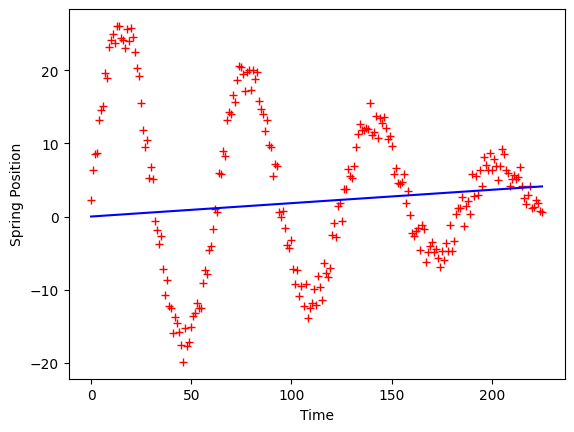

In [488]:
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y1.x, yhat1, 'b-')  # yhat = y1.x*beta[0]
plt.ylabel('Spring Position')
plt.xlabel('Time')

Defining functions to reuse the proce

Adding an bias and checking how it effects SSE


In [489]:
y1df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.SpringPos})
yy = np.array(y1df.y) 
xx = np.array(y1df[["bias","x"]])
y1df.head()


,bias,x,y
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17


### Computing Beta and SSE with the bias


In [490]:
beta2 = estimateBeta(xx, yy)
print("beta =", beta2)
yhat2 = predict(beta2, xx)
loss = SSE(yy, yhat2)
print("SSE =", loss)

beta = [ 6.8505263  -0.02724716]
SSE = 25069.131971939343


### Plotting it side by side


Text(0.5, 0, 'Time')

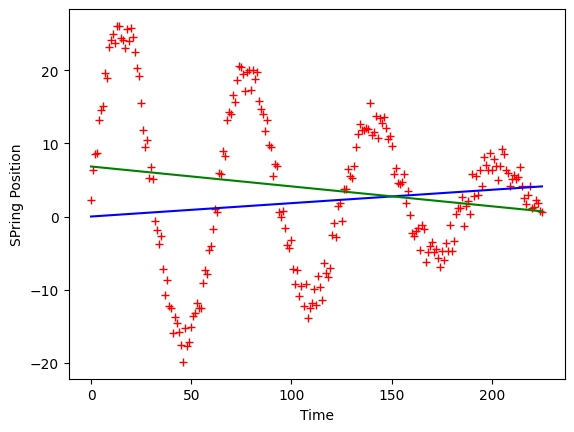

In [491]:
plt.plot(y1df.x, y1df.y, 'r+')
plt.plot(y1df.x, yhat1, 'b-')
plt.plot(y1df.x, yhat2, 'g-')
plt.ylabel('SPring Position')
plt.xlabel('Time')

### Now we to add periodic factor into our calculation we add a new parameter sin(x) for the periodicity in the values and we also introduce time factor as new updated feature by doing x*β that is a updated feature space

In [492]:
x1= np.round(x*beta2[1],2)
x2 = np.sin(x1)
new_data=y1df.copy()
new_data['x1']=x1
new_data['x2']=x2
new_data

# y11 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.SpringPos.values})
# y11.head(10)

,bias,x,y,x1,x2
0,1.0,0,2.27,-0.00,-0.000000
1,1.0,1,6.38,-0.03,-0.029996
2,1.0,2,8.61,-0.05,-0.049979
3,1.0,3,8.65,-0.08,-0.079915
4,1.0,4,13.17,-0.11,-0.109778
...,...,...,...,...,...
221,1.0,221,1.37,-6.02,0.260157
222,1.0,222,2.29,-6.05,0.231078
223,1.0,223,1.80,-6.08,0.201790
224,1.0,224,0.82,-6.10,0.182163


### Converting the data into matrices and Plotting the case for beta and SSE calculation with updated features(time x)


In [493]:
xx = np.array(new_data[['bias', 'x1', 'x2']])
yy = np.array(new_data.y) 

In [494]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = SSE(yy, yhat3) ##np.sum((np.matmul(xx,beta) - yy)**2) from the defined function
print("SSE = ", loss)

Beta =  [11.99634589  2.6761454   5.21496085]
SSE =  23939.67344042505


Text(0.5, 0, 'Time')

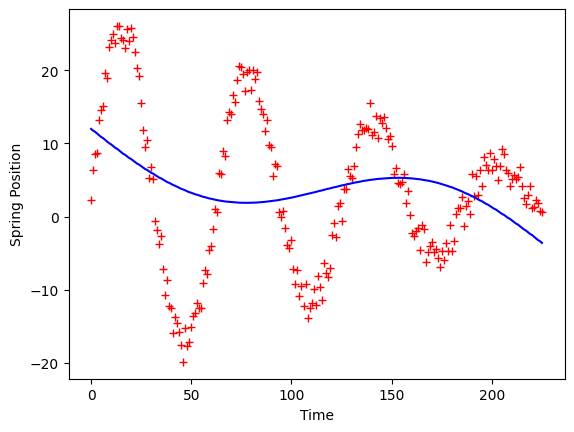

In [495]:
plt.plot(y11.x, y11.y, 'r+')
plt.plot(y11.x, yhat3, 'b-')
plt.ylabel('Spring Position')
plt.xlabel('Time')

### We also see the polynomial fit for our model

In [496]:
# x1 = round(y1.x*beta2[1],2)

# y11 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "y":data.SpringPos})
# y11.head(10)

### Data matrices

In [497]:
xx = np.array(new_data[['x1']])
yy = np.array(new_data.y) 

In [498]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 17)   
X_poly = poly_transformer.fit_transform(xx)

In [499]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)

loss = SSE(yy, yhat4)
print("SSE = ", loss)

Intercept= 2.8613881313622787 Beta =  [ 0.00000000e+00 -9.38791738e+01 -3.56513047e+01  1.48615982e+02
 -2.02100024e+01 -1.11359086e+02  6.07423718e+01  7.48196135e+01
 -4.39848673e+01 -7.70783056e+01 -3.99234494e+01 -1.03204228e+01
 -1.18062681e+00  6.15084412e-02  3.95663646e-02  5.54337331e-03
  3.63863118e-04  9.63878668e-06]
SSE =  460.0810657028443


In [500]:
yy

array([  2.27,   6.38,   8.61,   8.65,  13.17,  14.52,  15.12,  19.62,
        18.91,  23.17,  24.17,  24.96,  23.72,  26.1 ,  26.09,  24.4 ,
        24.21,  23.12,  25.71,  24.06,  25.86,  24.64,  22.51,  20.31,
        19.27,  15.58,  11.91,   9.57,  10.53,   5.32,   6.8 ,   5.13,
        -0.64,  -1.91,  -3.77,  -2.6 ,  -7.16, -10.78,  -8.69, -12.28,
       -12.58, -15.95, -13.74, -14.59, -15.8 , -17.53, -19.91, -15.32,
       -17.69, -17.25, -15.17, -13.66, -13.19, -11.89, -12.57, -12.54,
        -9.06,  -7.35,  -7.89,  -4.57,  -3.98,  -1.7 ,   1.  ,   0.65,
         6.02,   5.76,   9.  ,   8.23,  13.22,  14.31,  14.02,  16.63,
        15.67,  18.69,  20.6 ,  20.42,  19.51,  17.19,  19.75,  20.03,
        17.3 ,  20.08,  18.8 ,  19.77,  15.78,  14.67,  14.01,  11.72,
        13.21,   9.8 ,   9.52,   5.57,   7.25,   6.89,   0.68,  -0.07,
         0.72,  -1.51,  -3.9 ,  -4.32,  -3.18,  -7.19,  -9.25,  -7.38,
       -10.89,  -9.51, -12.21,  -9.18, -13.89, -12.47, -11.79,  -9.98,
      

In [512]:
# plt.plot(y1.x, y1.y, 'r+')
# plt.plot(y1.x, yhat4, 'b-')
# plt.ylabel('Spring Position')
# plt.xlabel('Time')
# plt.legend(['Price', 'OLS'], loc='upper right')
# plt.show()

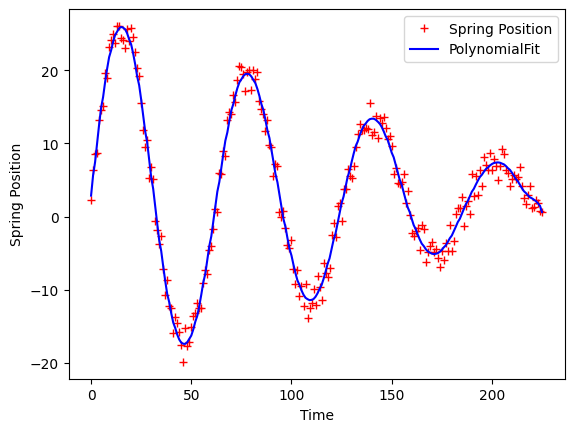

In [510]:
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y1.x, yhat4, 'b-')
plt.legend(['Spring Position', 'PolynomialFit', ], loc='upper right')
plt.show()

### Splitting the data into train test evaluation for Interpolation


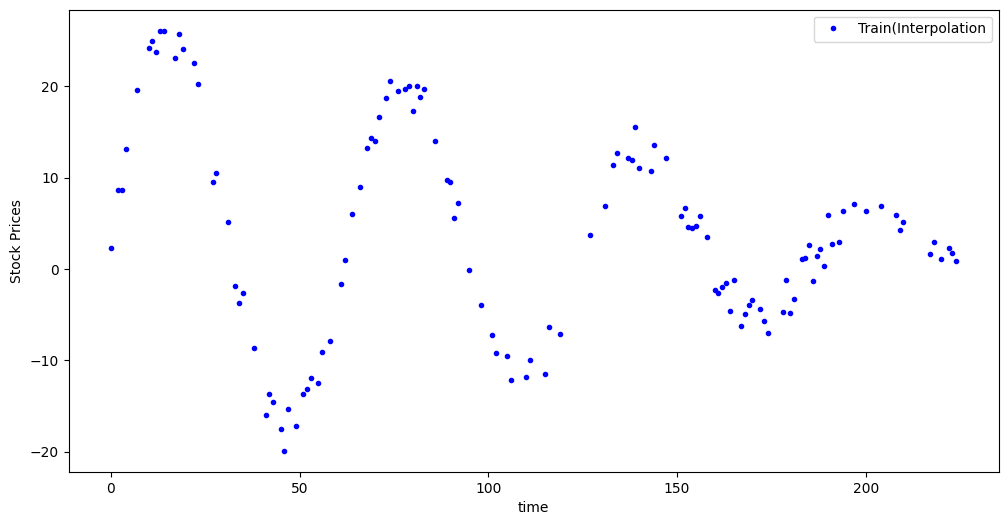

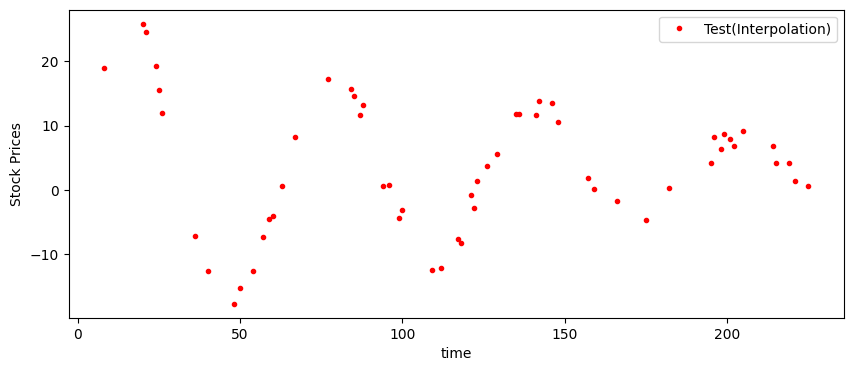

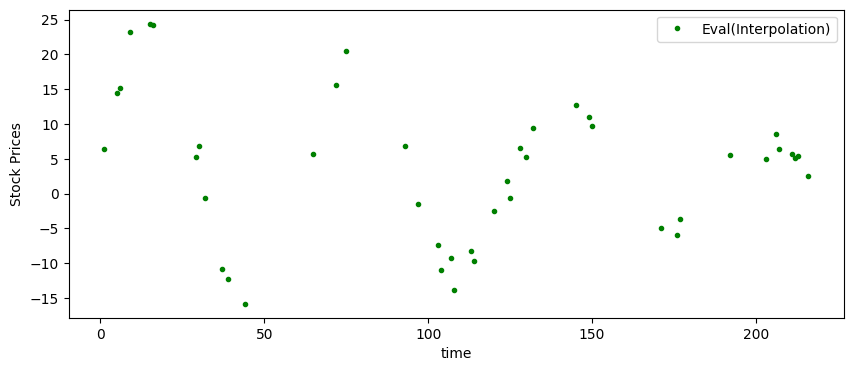

In [503]:
train_data, test_data = train_test_split(data.SpringPos, test_size=0.25, random_state=30)
train_data, eval_data = train_test_split(train_data, test_size=0.25, random_state=30)

# Visualising the data

plt.figure(figsize=(12, 6))
plt.plot(train_data, 'b.', label = 'Train(Interpolation')
plt.xlabel('time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(test_data, 'r.', label = 'Test(Interpolation)')
plt.xlabel('time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(eval_data,'g.', label = 'Eval(Interpolation)')
plt.xlabel('time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


### Task 3 Extrapolation


In [504]:
X_train,X_test,y_train,y_test=train_test_split(xx,yy,test_size=0.25,random_state=30)


In [505]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [506]:
pred=model.predict(X_test)

In [507]:
np.sum((pred-y_test)**2)

np.float64(5843.873782456679)